# Tarea 1A
***Autores:** Pablo Montes, Joaquín Pelle y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como (según corresponda): 
**apellido_nombre_tarea_1.ipynb** o **grupo_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**Antes de entregar, serciorese que todas las variables estén bien definidas, para ello interrumpa el kernel y corra todo desde cero.**

**El objetivo de las primeras tareas (A y B) es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

**1)** La ecuación diferencial

$$
\frac{dy}{dt} = \lambda y
$$

tiene como solución la función 
$$ y(t) = y_0e^{\lambda t}, $$
donde $y_0$ es una constante que depende del dato inicial, es el valor de $y(t)$ en $t=0$.

Buscamos una aproximación numérica utilizando el *método de Euler*,
$$y(t+\Delta t) \approx y(t) + \Delta t \dfrac{dy}{dt}(t) = y(t) + \Delta t \lambda y(t)$$
tomando $\lambda = 2$ y dato inicial $y(0) = 1$ en el intervalo de tiempo $[0,2]$.


**Implementación del método:**

Una forma simple de implementar el método de Euler sería la siguiente
```julia
#Datos iniciales
λ = 2
y0 = 1
#Cantidad de pasos temporales y dt
Tfin = 2.0
N = 201
dt = Tfin/(N-1)

#Vectores donde guardamos la solución
tiempos = zeros(N)
y = zeros(N)
#Asignamos el dato inicial
y[1] = y0
#Evolución temporal usando el método de Euler
for i in 2:N
    tiempos[i] = dt*(i-1)      #Actualizamos el valor de t
    y[i] = y[i-1] + dt*λ*y[i-1]  #Hacemos un paso de Euler
end
```


Lo que haremos es partir este procedimiento en algunas funciones pequeñas, de manera que cuando en el futuro queramos cambiar de método numérico, o resolver otra ecuación diferencial, esto se pueda hacer de manera directa. Las funciones que usaremos están en el archivo ``myODEfunctions.jl``

In [52]:
include("myODEfunctions.jl")

myODEsolver (generic function with 1 method)

Nuestra implementación del método de Euler entonces será la siguiente: (esto será similar a la librería `DifferentialEquations.jl` que usaremos más adelante)

In [53]:
#1) Datos del problema:

CrecimientoExponencial(y, t, λ) = λ*(y) # Definimos el término derecho de la ODE
y0 = 1.0                                # Datos iniciales
T = (0.0, 4.0)                          # Intervalo temporal
λ = 2.;par = (λ)                        # Parámetros del problema (dentro de una tupla)

#Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par)

(CrecimientoExponencial, 1.0, (0.0, 4.0), 2.0)

Elegimos una cantidad de pasos temporales apropiados y resolvemos:

In [54]:
N = 101 # Cantidad de pasos temporales
# Resolvemos el problema "prob" usando el método "EulerStep" 
dt = (T[2]-T[1])/(N-1) # discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
t, y = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  3.64, 3.68, 3.72, 3.7600000000000002, 3.8000000000000003, 3.84, 3.88, 3.92, 3.96, 4.0], [1.0; 1.08; … ; 2036.8159780937817; 2199.761256341284;;])

Una vez obtenida la solución la graficamos.

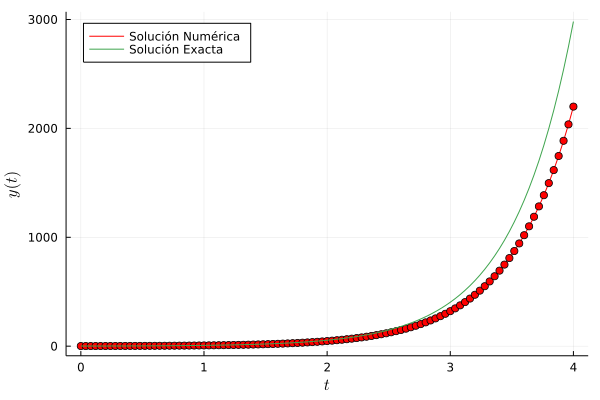

In [55]:
using Plots
gr()
plt = plot()
plot!(plt, t, y, color = :red, label = "Solución Numérica")
scatter!(plt, t, y, color = :red, label = "")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

### Problema 1: ###

***1a)*** Juegue con distintos valores de `dt` (`N`) y datos iniciales. Vea qué sucede a medida que aumenta o disminuye `dt`. 

In [56]:
CrecimientoExponencial(y,t,λ)=λ*(y) # Definimos el término derecho de la ODE
T = (0.0, 5.0)                    # Intervalo temporal
N=2^10;                             # number of time intervals 2^10=1024
dt=(T[2]-T[1])/(N-1);               # time step

Para $\Delta {t}$ fijo, tomamos distintos datos inicales $(y_{0},\lambda)$. Primero variando $y(0)$ (manteniendo fijo $\lambda$) y luego variando $\lambda$ (manteniendo fijo $y(0)$)

In [57]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### VARIANDO solo y0
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
λ =1.0;par=(λ);

y0=1.0;                                            # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par) # Definimos el problema
t,y_01=myODEsolver(prob,EulerStep,dt=dt);          # Integramos la solución
y_exact_01=y0*exp.(λ*t);                           # Solución exacta

y0=2.0;                                            # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par) # Definimos el problema
t,y_02=myODEsolver(prob,EulerStep,dt=dt);          # Integramos la solución
y_exact_02=y0*exp.(λ*t);                           # Solución exacta

y0=3.0;                                            # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par) # Definimos el problema
t,y_03=myODEsolver(prob,EulerStep,dt=dt);          # Integramos la solución
y_exact_03=y0*exp.(λ*t);                           # Solución exacta

In [58]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### VARIANDO solo λ
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=1.0;

λ =2.0;par=(λ);                                    # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par) # Definimos el problema
t,y_04=myODEsolver(prob,EulerStep,dt=dt);          # Integramos la solución
y_exact_04=y0*exp.(λ*t);                           # Solución exacta

λ =3.0;par=(λ);                                    # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par) # Definimos el problema
t,y_05=myODEsolver(prob,EulerStep,dt=dt);          # Integramos la solución
y_exact_05=y0*exp.(λ*t);                           # Solución exacta

### Ploteamos los resultados

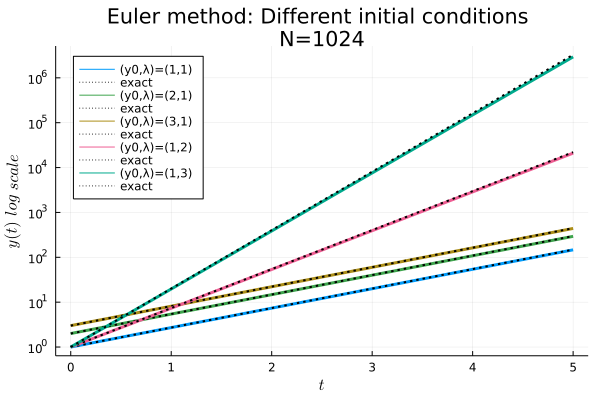

In [59]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot(yaxis=:log)
plot!(plt,t,y_01,label="(y0,λ)=(1,1)",lw=3)
plot!(plt,t,y_exact_01,label="exact",line=(:dot,2),color="black")
plot!(plt,t,y_02,label="(y0,λ)=(2,1)",lw=3)
plot!(plt,t,y_exact_02,label="exact",line=(:dot,2),color="black")
plot!(plt,t,y_03,label="(y0,λ)=(3,1)",lw=3)
plot!(plt,t,y_exact_03,label="exact",line=(:dot,2),color="black")
plot!(plt,t,y_04,label="(y0,λ)=(1,2)",lw=3)
plot!(plt,t,y_exact_04,label="exact",line=(:dot,2),color="black")
plot!(plt,t,y_05,label="(y0,λ)=(1,3)",lw=3)
plot!(plt,t,y_exact_05,label="exact",line=(:dot,2),color="black")
plot!(ylabel="\$y(t)\$ \$log\$ \$scale\$",xlabel="\$t\$",title="Euler method: Different initial conditions \n N=1024 ")
plot!(plt,legend=:topleft)

 Ahora para unos datos inicales $(y_{0},\lambda)$ fijos, tomamos distintos valores de $\Delta {t}$

In [60]:
T = (0.0, 100.0)                                    # Intervalo temporal
y0=5.0;λ =2.0;par=(λ);                              # condiciones iniciales
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # Definimos el problema

In [61]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### VARIANDO dt (ó N)
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2^9;dt=(T[2]-T[1])/(N-1);                  # number of time intervals and time step
t_01,y_01=myODEsolver(prob,EulerStep,dt=dt); # Integramos la solución

N=2^10;dt=(T[2]-T[1])/(N-1);                 # number of time intervals and time step
t_02,y_02=myODEsolver(prob,EulerStep,dt=dt); # Integramos la solución

N=2^11;dt=(T[2]-T[1])/(N-1);                 # number of time intervals and time step
t_03,y_03=myODEsolver(prob,EulerStep,dt=dt); # Integramos la solución

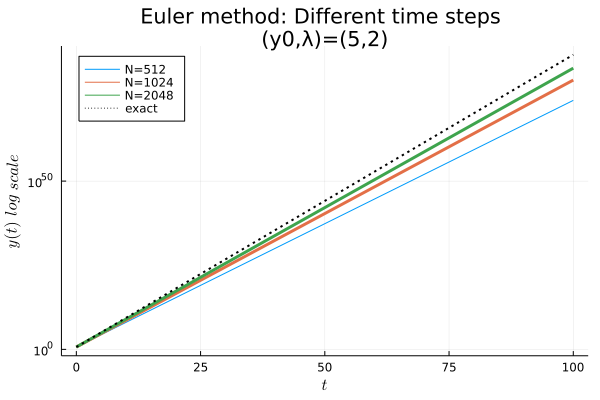

In [62]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot(yaxis=:log)
plot!(plt,t_01,y_01,label="N=512")
plot!(plt,t_02,y_02,label="N=1024",lw=3)
plot!(plt,t_03,y_03,label="N=2048",lw=3)
plot!(plt,t_01,y0*exp.(λ*t_01),label="exact",line=(:dot,2),color="black")
plot!(ylabel="\$y(t)\$ \$log\$ \$scale\$",xlabel="\$t\$",title="Euler method: Different time steps \n (y0,λ)=(5,2) ")
plot!(plt,legend=:topleft)

***1b)*** ¿Cómo se comporta el sistema si $\lambda$ y/o $y_0$ son números complejos?. Pruebe con $\lambda$ imaginario. Grafique. 

*Pista 1: Un número complejo $c = a + bi$ se define en julia como como `c = a + bim`. Las funciones `real(c)` e `imag(c)` retornan `a` y `b` respectivamente.*

*Pista 2: Si toma $\lambda$ complejo, también debe tomar el dato inicial como número complejo, aunque sea real, por ejemplo $y_0 = 1.0 + 0.0im$*

In [63]:
y0=ComplexF64(1.0+0.0*im);                          # Datos iniciales
T=(0.0,10.0);                                        # Intervalo temporal
λ=ComplexF64(1.0+1.0*im);par=(λ);                   # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

In [64]:
N=101;                                 # Cantidad de pasos temporales
dt=(T[2]-T[1])/(N-1);                  # discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
t,y=myODEsolver(prob,EulerStep,dt=dt); # resolvemos usando método de Euler

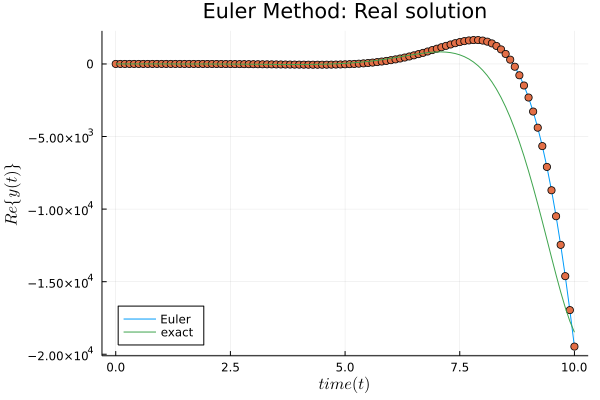

In [65]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS PARTE REAL DE LA SOLUCIÓN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t,real(y),label="Euler")
scatter!(plt,t,real(y),label="")
plot!(plt,t,real(y0*exp.(λ*t)), label = "exact")
plot!(ylabel="\$ Re \\{ y(t) \\} \$",xlabel="\$time (t)\$")
plot!(plt,legend=:bottomleft,title="Euler Method: Real solution")

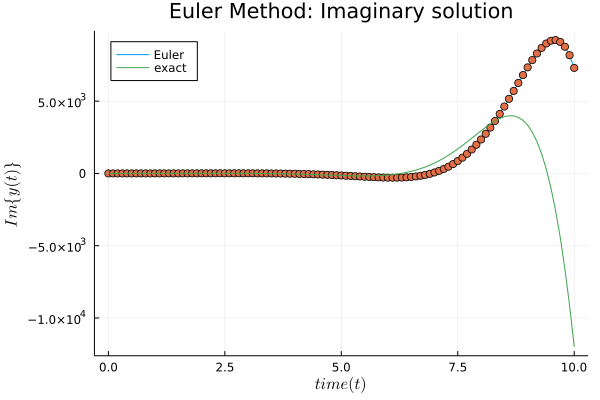

In [66]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS PARTE IMAGINARIA DE LA SOLUCIÓN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
plot!(plt,t,imag(y),label="Euler")
scatter!(plt,t,imag(y),label="")
plot!(plt,t,imag(y0*exp.(λ*t)),label="exact")
plot!(ylabel="\$ Im \\{ y(t) \\} \$",xlabel="\$time (t)\$")
plot!(plt,legend=:topleft,title="Euler Method: Imaginary solution")

***1c)*** Utilice varios N para calcular el factor $Q$ del método de Euler.

In [67]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=ComplexF64(1.0+0.0*im);         # Datos iniciales
T=(0.0,10.0);                      # Intervalo temporal
λ=ComplexF64(1.0+1.0*im);par=(λ);

In [68]:
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N-1;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=4*N-3;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N-1;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=4*N-3;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N-1;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=4*N-3;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,EulerStep,dt=dt); # integramos la solución con método de Euler (para 4N pasos)


In [69]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### FUNCIÓN PARA CALCULAR EL FACTOR Q
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
using LinearAlgebra
function Q_factor(sol_n,sol_2n,sol_4n)
    num=zero(copy(sol_n));          # numerador inicializado a cero
    den=zero(copy(sol_n));          # denominador inicializado a cero
    Q=zero(copy(real(sol_n)));      # factor Q inicializado a cero
    sol2n=copy(sol_2n[1:2:end]);    #
    sol4n=copy(sol_4n[1:4:end]);    #

    # FORMA 1
    for i in 1:length(sol_n)
        num[i]=norm(sol_n[i])-norm(sol2n[i]); # usamos norma L2
        den[i]=norm(sol2n[i])-norm(sol4n[i]);
        Q[i]=real(num[i])/real(den[i]);
    end

    # FORMA 2 (usando broadcasting, más compacto y eficiente)
    # num.=norm(sol_n).-norm(sol2n);
    # den.=norm(sol2n).-norm(sol4n);
    # Q.=real(num)./real(den);

    return Q
end

Q_factor (generic function with 1 method)

Ploteamos las soluciones (al menos para N=512) para asegurarnos de que la soluciones dan bien.

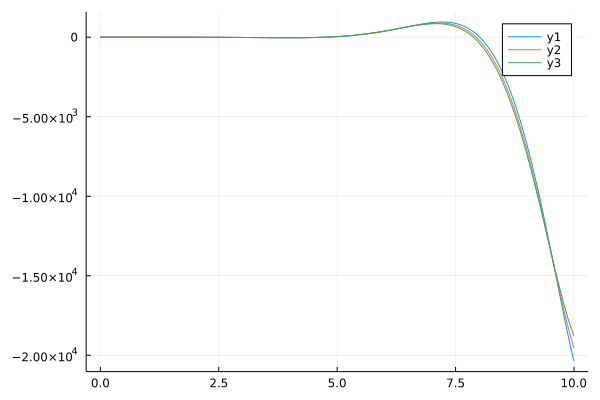

In [70]:
plt=plot()
plot!(plt,t_N1,real(y_N1))
plot!(plt,t_N2,real(y_N2))
plot!(plt,t_N3,real(y_N3))

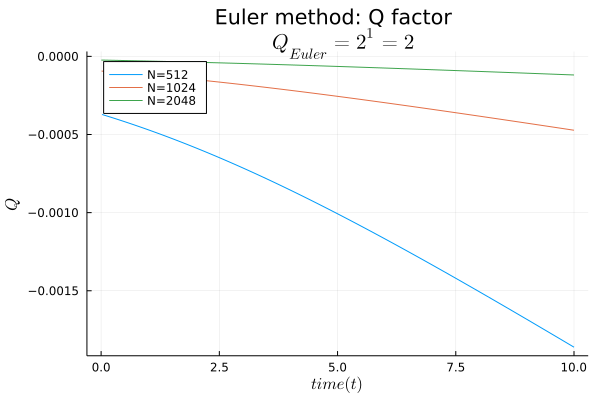

In [71]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt, legend = :topleft, title = "Euler method: Q factor \n  \$Q_{Euler}=2^{1}=2 \$")

***1d)***
Usando $\lambda = 1, y_0 = 1$, implemente los métodos de Runge-Kutta de orden 2 y 4 creando dos funciones llamadas `RK2step` y `RK4step`, similares a `EulerStep`. Vuelva a graficar para distintos $N$ y calcule el factor $Q$ para estos métodos. Nota: para RK2 puede usar el que se llama *método de Heum* o el que se denomina *método de Euler Mejorado*, o ambos (con nombres distintos).

***Ayuda:** Primero defina las funciones en una celda y pruébelas hasta estar seguro que están funcionando correctamente. Sólo cuando esté seguro cópielas a el archivo  ``myODEfunctions.jl``. Es más eficiente y cómodo trabajar en el notebook!*

In [72]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=1.0;        # Datos iniciales
T=(0.0,10.0);  # Intervalo temporal
λ=1.0;par=(λ); # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

In [73]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK2 MÉTODO DE HEUN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

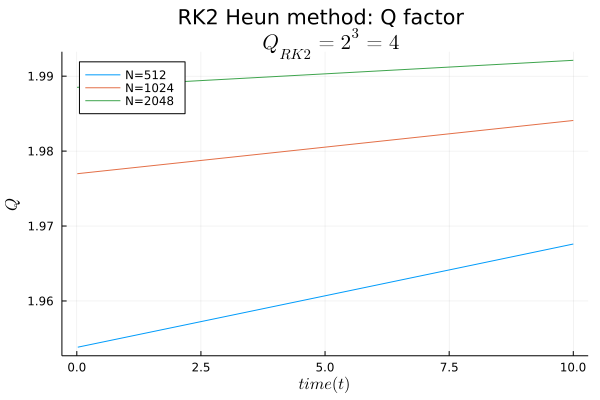

In [74]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt, legend = :topleft, title = "RK2 Heun method: Q factor \n  \$Q_{RK2}=2^{3}=4 \$")

In [75]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK4
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

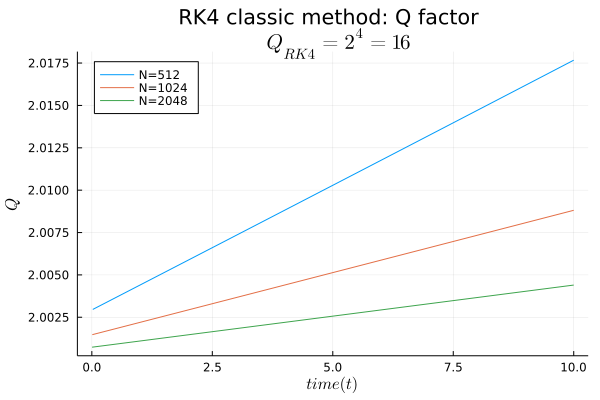

In [76]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt, legend = :topleft, title = "RK4 classic method: Q factor \n  \$Q_{RK4}=2^{4}=16 \$")

***1e)*** Repita el punto anterior para $\lambda = i$ y $y_0 = 1$. ¿Qué diferencia ve entre los métodos? 

In [77]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=1.0+0.0*im;        # Datos iniciales
T=(0.0,10.0);         # Intervalo temporal
λ=0.0+1.0*im;par=(λ); # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

In [78]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK2 MÉTODO DE HEUN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

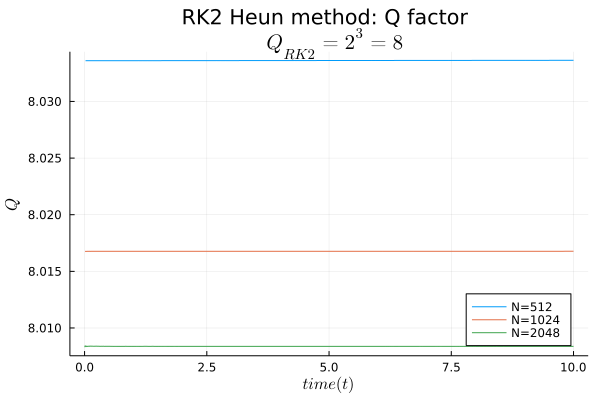

In [79]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt,legend=:bottomright,title="RK2 Heun method: Q factor \n  \$Q_{RK2}=2^{3}=8 \$")

In [80]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK4
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

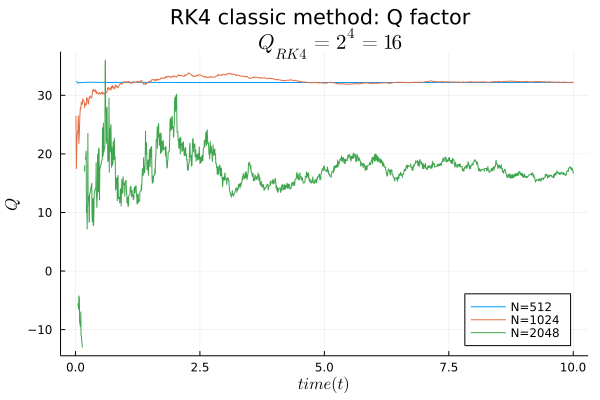

In [81]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt, legend = :bottomright, title = "RK4 classic method: Q factor \n  \$Q_{RK4}=2^{4}=16 \$")

### Problema 2: ###
**Estabilidad de la solución**

Considere la ecuación
$\frac{dy}{dt} = y - y^2$

Esta ecuación tiene dos puntos estacionarios: $y(t) = 1$ e $y (t) = 0$. Evolucione numéricamente con `y0 = 0:0.1:2` (es decir, con datos iniciales $y_0 = 0, y_0 = 0.1,...,y_0 = 2$). Considere para esto el intervalo temporal $[0, 10]$. Grafique con distintos métodos y valores de N y trate de comprender el comportamiento de la solución.

*Opcional:* Para ver el comportamiento para $y_0$ negativo pruebe con `y0 = (0:-0.1:-0.5)` en el intervalo temporal [0,1].

Consideramos la siguiente ecuación diferencial lineal general

$\frac{dy}{dt} = f(y,t,\lambda_{1,2}) \Rightarrow f(y,t,\lambda_{1,2})=\left( \lambda_{1}y^{2}+\lambda_{2}y \right)=\lambda_{1}y\left( y+\frac{\lambda_{2}}{\lambda_{1}} \right)$

In [82]:
# Definimos el término derecho de la ODE
function f_vector(y,t,λ)
    fvector = zero(Array{typeof(y[1])}(undef, length(y)))
    for i in 1:length(y)
        fvector[i] = λ[1]*y[i]*(y[i]+λ[2]/λ[1])
    end
    return fvector
end

f_vector (generic function with 1 method)

In [83]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0_data=(0.0,2.0,10)    # Intervalo de condiciones inicales y num. de valores diferentes
T=(0.0,10.0);           # Intervalo temporal
λ1=-1;λ2=1;par=(λ1,λ2); # Parámetros del problema (dentro de una tupla)

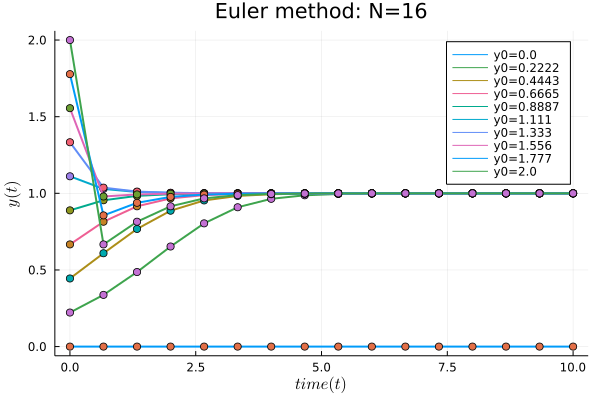

In [84]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO DE EULER
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=16 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    # Resolvemos EDO usando el método de Euler
    t,y_euler=myODEsolver(prob_euler,EulerStep,dt=dt);
    plot!(plt,t,y_euler[:,1],label="y0=$(Float16(y0))",lw=2)
    scatter!(plt,t, y_euler[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="Euler method: N=16")

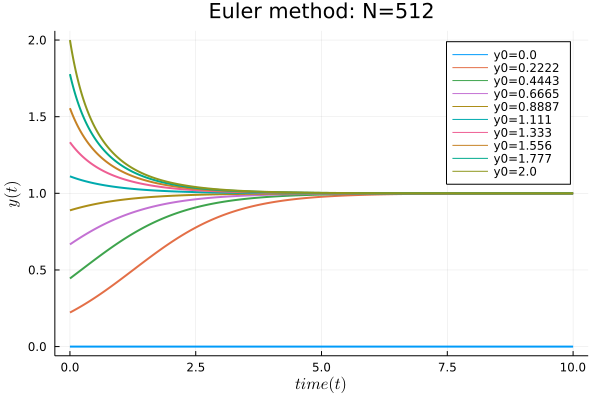

In [85]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO DE EULER
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=512 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    # Resolvemos EDO usando el método de Euler
    t,y_euler=myODEsolver(prob_euler,EulerStep,dt=dt);
    plot!(plt,t,y_euler[:,1],label="y0=$(Float16(y0))",lw=2)
    #scatter!(plt,t, y_euler[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="Euler method: N=512")

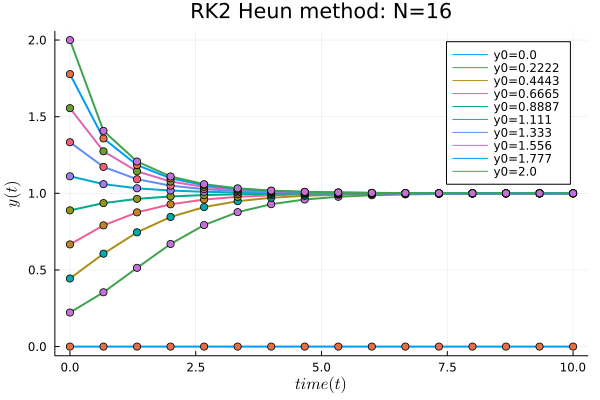

In [86]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO RK2 Heun
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=16 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    t,y_RK2_Heun=myODEsolver(prob_euler,RK2step_Heun,dt=dt);
    plot!(plt,t,y_RK2_Heun[:,1],label="y0=$(Float16(y0))",lw=2)
    scatter!(plt,t, y_RK2_Heun[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="RK2 Heun method: N=16")

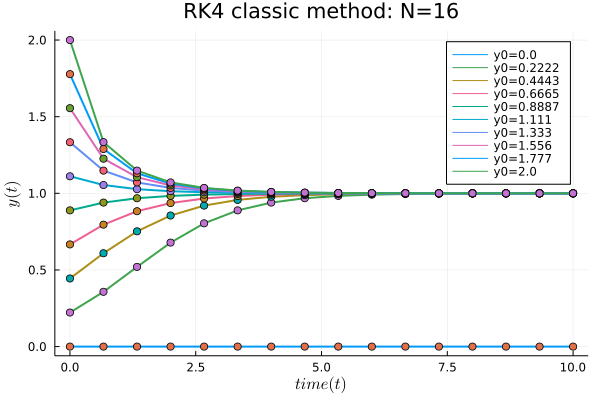

In [87]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO DE RK4 CLASSIC
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=16 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    t,y_RK4=myODEsolver(prob_euler,RK4step,dt=dt);
    plot!(plt,t,y_RK4[:,1],label="y0=$(Float16(y0))",lw=2)
    scatter!(plt,t,y_RK4[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="RK4 classic method: N=16")

### Problema 3: ###
**Sistemas de ecuaciones**

La ecuación diferencial ordinaria de segundo orden
$$
\dfrac{d^{2}u(t)}{dt^2} = -\alpha^{2} u(t), \quad \alpha > 0
$$

tiene como solución general $u = A\textrm{cos}(\alpha t) +  B\textrm{sen}(\alpha t)$.

Para resolverla numéricamente, podemos convertirla en un sistema de ecuaciones se ordinarias de primer orden definiendo $v = \dfrac{du}{dt}$.

$$
    \begin{array}{c}
    \dfrac{du}{dt} &= &  v \\
    \dfrac{dv}{dt} &= &-\alpha^{2} u
    \end{array}
$$

***3a)*** Considere $$\alpha = 1, \quad u(0) = 1,\quad  v(0) = 0.$$ 
Grafique y compare el desempéño de los distintos métodos con la solución exacta.


*Pista: defina `y0 = [u0, v0]`*

In [88]:
α=1.0;                        # factor
u0=1.0;v0=0.0;y0=[u0;v0];     # condiciones iniciales
λ1=1.0;λ2=-(α*α);par=(λ1,λ2); # Parámetros del problema (dentro de una tupla)

In [89]:
# Definimos el término derecho de la ODE
function f_vector(y,t,λ)
    fvector = zero(Array{typeof(y[1])}(undef, length(y)))
    for i in 1:length(y)
        fvector[i] = λ[i]*y[length(y)+1-i]
    end
    return fvector
end

f_vector (generic function with 1 method)

In [90]:
time_tuple = (0.0, 10.0); # Intervalo temporal (tupla)

#Guardamos los datos en la variable "prob"
prob_euler = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK2Heun = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2midpoint = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2Ralston = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK4step = myODEproblem(f_vector, y0, time_tuple, par)

(f_vector, [1.0, 0.0], (0.0, 10.0), (1.0, -1.0))

In [91]:
N = 100 # Cantidad de pasos temporales
dt = (time_tuple[2]-time_tuple[1])/(N-1) # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))

# Resolvemos EDO usando el método de Euler 
t, y_euler = myODEsolver(prob_euler, EulerStep, dt = dt)

# Resolvemos EDO usando métodos de Runge Kutta de 2do orden 
t, y_RK2Heun = myODEsolver(prob_RK2Heun, RK2step_Heun, dt = dt)             # Heun
t, y_RK2midpoint = myODEsolver(prob_RK2midpoint, RK2step_midpoint, dt = dt) # Midpoint
t, y_RK2Ralston = myODEsolver(prob_RK2Ralston, RK2step_Ralston, dt = dt)    # Ralston

# Resolvemos EDO usando métodos de Runge Kutta de 4to orden  
t, y_RK4step = myODEsolver(prob_RK4step, RK4step, dt = dt)                  # Clásico


([0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091  …  9.09090909090909, 9.191919191919192, 9.292929292929292, 9.393939393939394, 9.494949494949495, 9.595959595959595, 9.696969696969697, 9.797979797979798, 9.8989898989899, 10.0], [1.0 0.0; 0.99490281733178 -0.10083833265141295; … ; -0.889656121199385 0.4566295458500775; -0.8390756193948379 0.5440134615380426])

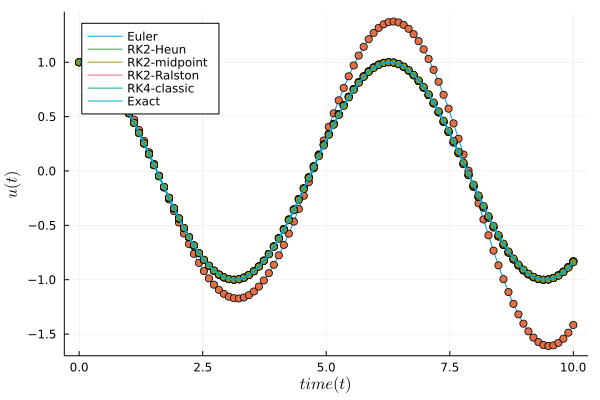

In [92]:
plt = plot()

plot!(ylabel = "\$u(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft)

plot!(plt, t, y_euler[:,1], label = "Euler")
scatter!(plt, t, y_euler[:,1], label = "")

plot!(plt, t, y_RK2Heun[:,1], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,1], label = "")
plot!(plt, t, y_RK2midpoint[:,1], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,1], label = "")
plot!(plt, t, y_RK2Ralston[:,1], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,1], label = "")

plot!(plt, t, y_RK4step[:,1], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,1], label = "")

plot!(plt, t, cos.(t), label = "Exact",lw=2)


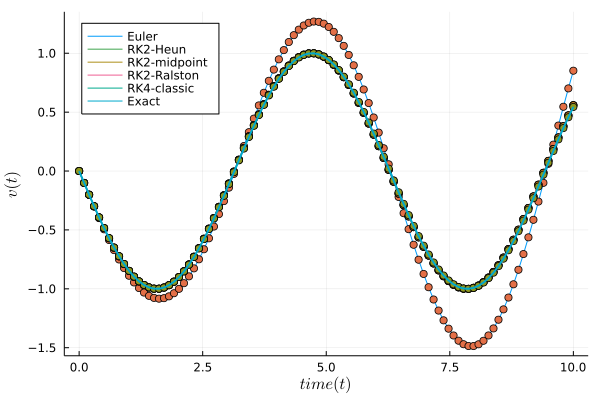

In [93]:
plt = plot()

plot!(ylabel = "\$v(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft)

plot!(plt, t, y_euler[:,2], label = "Euler")
scatter!(plt, t, y_euler[:,2], label = "")

plot!(plt, t, y_RK2Heun[:,2], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,2], label = "")
plot!(plt, t, y_RK2midpoint[:,2], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,2], label = "")
plot!(plt, t, y_RK2Ralston[:,2], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,2], label = "")

plot!(plt, t, y_RK4step[:,2], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,2], label = "")

plot!(plt, t, -sin.(t), label = "Exact",lw=2)

***3b)***

Resuelva ahora el sistema del péndulo físico: 

$$
\frac{d}{dt}\left(
    \begin{array}{c}
    y_1 \\
    y_2
    \end{array}
    \right)
    = 
    \left(
    \begin{array}{c}
    y_2 \\
    -sin(y_1)
    \end{array}
    \right)
$$

con con $y_0 = (0.1,0)$ en el intervalo $t=[0,10]$. 

Grafique las soluciones obtenidas. Use varios métodos y modifique el tamaño del paso temporal. Use otros datos iniciales. 

Vea que la función $E(y) = \frac{1}{2} y_2^2 + (1-cos(y_1))$ es constante a lo largo de la evolución (una *constante del movimiento*) y vea que sucede numericamente. 

In [94]:
# Definimos el término derecho de la ODE
function f_vector(y,t,λ)
    fvector = zero(Array{typeof(y[1])}(undef, length(y)))
    for i in 1:length(y)
        fvector[i] = λ[i]*y[length(y)+1-i]
        if ((length(y)+1-i)==1) fvector[i]=λ[i]*sin(y[length(y)+1-i]) end;
    end
    return fvector
end

f_vector (generic function with 1 method)

In [95]:
u0=0.1;v0=0.0;y0=[u0;v0];   # condiciones iniciales
λ1=1.0;λ2=-1.0;par=(λ1,λ2); # Parámetros del problema (dentro de una tupla)

In [96]:
time_tuple = (0.0, 10.0); # Intervalo temporal (tupla)

#Guardamos los datos en la variable "prob"
prob_euler = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK2Heun = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2midpoint = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2Ralston = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK4step = myODEproblem(f_vector, y0, time_tuple, par)

(f_vector, [0.1, 0.0], (0.0, 10.0), (1.0, -1.0))

In [97]:
N = 32 # Cantidad de pasos temporales
dt = (time_tuple[2]-time_tuple[1])/(N-1) # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))

# Resolvemos EDO usando el método de Euler 
t, y_euler = myODEsolver(prob_euler, EulerStep, dt = dt)

# Resolvemos EDO usando métodos de Runge Kutta de 2do orden 
t, y_RK2Heun = myODEsolver(prob_RK2Heun, RK2step_Heun, dt = dt)             # Heun
t, y_RK2midpoint = myODEsolver(prob_RK2midpoint, RK2step_midpoint, dt = dt) # Midpoint
t, y_RK2Ralston = myODEsolver(prob_RK2Ralston, RK2step_Ralston, dt = dt)    # Ralston

# Resolvemos EDO usando métodos de Runge Kutta de 4to orden  
t, y_RK4step = myODEsolver(prob_RK4step, RK4step, dt = dt)                  # Clásico


([0.0, 0.3225806451612903, 0.6451612903225806, 0.967741935483871, 1.2903225806451613, 1.6129032258064515, 1.935483870967742, 2.258064516129032, 2.5806451612903225, 2.903225806451613  …  7.096774193548387, 7.419354838709677, 7.741935483870968, 8.064516129032258, 8.387096774193548, 8.709677419354838, 9.032258064516128, 9.35483870967742, 9.67741935483871, 10.0], [0.1 0.0; 0.09485057634874074 -0.031648490058978844; … ; -0.09697413083692641 0.024299071676391358; -0.08427697274245641 0.05374476609011142])

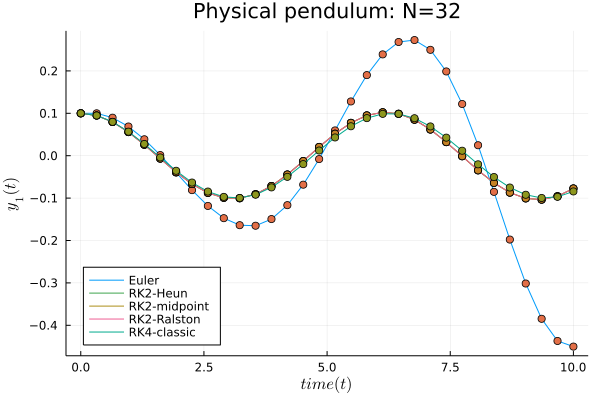

In [98]:
plt = plot()

plot!(ylabel = "\$y_{1}(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :bottomleft,title="Physical pendulum: N=32")

plot!(plt, t, y_euler[:,1], label = "Euler")
scatter!(plt, t, y_euler[:,1], label = "")

plot!(plt, t, y_RK2Heun[:,1], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,1], label = "")
plot!(plt, t, y_RK2midpoint[:,1], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,1], label = "")
plot!(plt, t, y_RK2Ralston[:,1], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,1], label = "")

plot!(plt, t, y_RK4step[:,1], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,1], label = "")

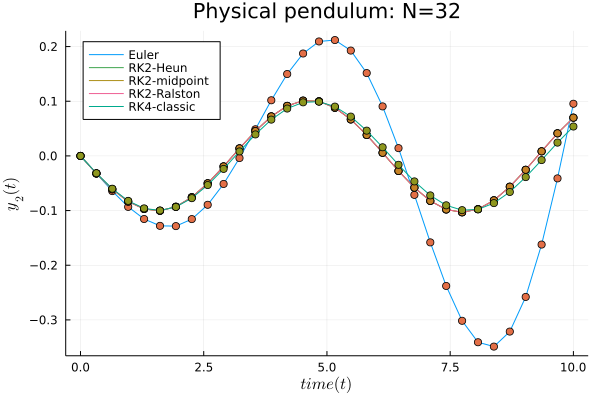

In [99]:
plt = plot()

plot!(ylabel = "\$y_{2}(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft,title="Physical pendulum: N=32")

plot!(plt, t, y_euler[:,2], label = "Euler")
scatter!(plt, t, y_euler[:,2], label = "")

plot!(plt, t, y_RK2Heun[:,2], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,2], label = "")
plot!(plt, t, y_RK2midpoint[:,2], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,2], label = "")
plot!(plt, t, y_RK2Ralston[:,2], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,2], label = "")

plot!(plt, t, y_RK4step[:,2], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,2], label = "")

### Calculamos la energía
$E(y) = \frac{1}{2} y_2^2 + (1-cos(y_1))$

In [100]:
function energy_physical_pendulum(y_matrix)
    # y_matrix[:,1]≡y1_vector;y_matrix[:,2]≡y2_vector
    E_vector=zero(Array{typeof(y_matrix[1,1])}(undef, length(y_matrix[:,1])))
    for i in 1:length(y_matrix[:,1])
        E_vector[i]=0.5*(y_matrix[i,2]*y_matrix[i,2])+(1.0-cos(y_matrix[i,1]))
    end
    return E_vector
end

energy_physical_pendulum (generic function with 1 method)

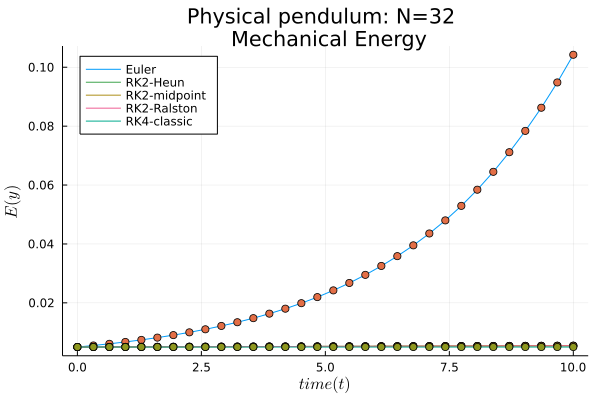

In [101]:
plt = plot();
plot!(ylabel = "\$E(y)\$", xlabel = "\$time (t)\$");
plot!(plt, legend = :topleft,title="Physical pendulum: N=32 \n Mechanical Energy");

plot!(plt, t, energy_physical_pendulum(y_euler), label = "Euler");
scatter!(plt, t, energy_physical_pendulum(y_euler), label = "");

plot!(plt, t, energy_physical_pendulum(y_RK2Heun), label = "RK2-Heun")
scatter!(plt, t, energy_physical_pendulum(y_RK2Heun), label = "")
plot!(plt, t, energy_physical_pendulum(y_RK2midpoint), label = "RK2-midpoint")
scatter!(plt, t, energy_physical_pendulum(y_RK2midpoint), label = "")
plot!(plt, t, energy_physical_pendulum(y_RK2Ralston), label = "RK2-Ralston")
scatter!(plt, t, energy_physical_pendulum(y_RK2Ralston), label = "")

plot!(plt, t, energy_physical_pendulum(y_RK4step), label = "RK4-classic")
scatter!(plt, t, energy_physical_pendulum(y_RK4step), label = "")